In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/7/data/sign

/content/drive/My Drive/Colab Notebooks/TOPICS IN APPLIED STATISTICS1/7/data


In [0]:
##############################################################

In [0]:
root_dir='C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'

In [0]:
# pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [0]:
import os
import glob 

In [0]:
# glob.glob 에 대해 알아보자.임의의 뭔가를 부를때 주로 사용.
# 1) '*'는 임의 길이의 모든 문자열을 의미한다.
# 2) '?'는 한자리의 문자를 의미한다.
# 3) recursive=True로 설정하고 '**'를 사용하면 모든 하위 디렉토리까지 탐색한다.
#    기본값은 False이며, 파일이 너무 많을 경우에 사용하면 과도한 cost가 소모된다고 한다.
#     ex) >>> output = glob.glob('dir/**', recursive=True)
# \\ 은 / 임.


all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm')) #ppm 확장자를 root_dir 에 붙여서 인식해라 라는 함수.
all_img_paths[-5:]

['C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00025.ppm',
 'C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00026.ppm',
 'C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00027.ppm',
 'C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00028.ppm',
 'C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00042\\00007_00029.ppm']

In [0]:
print(len(all_img_paths))

39209


In [0]:
all_img_paths[0:30:10]

['C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000\\00000_00000.ppm',
 'C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000\\00000_00010.ppm',
 'C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000\\00000_00020.ppm']

In [0]:
cv2.imread('C:/Users/82104/Desktop/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images\\00000\\00000_00000.ppm')

array([[[ 80,  78,  75],
        [ 78,  76,  74],
        [ 84,  87,  86],
        ...,
        [ 75,  75,  68],
        [ 68,  69,  65],
        [ 66,  67,  66]],

       [[ 86,  84,  83],
        [ 82,  80,  80],
        [ 84,  89,  90],
        ...,
        [ 78,  77,  73],
        [ 75,  78,  76],
        [ 78,  80,  80]],

       [[ 80,  78,  78],
        [ 86,  85,  86],
        [ 91,  90,  93],
        ...,
        [ 72,  74,  72],
        [ 69,  74,  73],
        [ 74,  78,  78]],

       ...,

       [[139, 134, 133],
        [132, 127, 122],
        [124, 121, 112],
        ...,
        [ 89,  94,  94],
        [ 91,  98,  97],
        [ 99, 103,  99]],

       [[ 99,  95,  91],
        [103,  98,  91],
        [ 89,  85,  74],
        ...,
        [ 95, 101, 103],
        [104, 113, 110],
        [ 98, 104,  96]],

       [[ 87,  84,  85],
        [107, 101,  95],
        [ 79,  74,  61],
        ...,
        [ 95, 102, 102],
        [ 90, 102,  99],
        [ 89,  97,  90]]

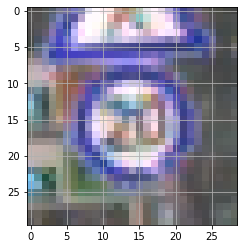

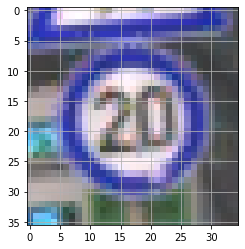

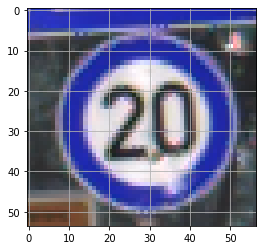

In [0]:
import matplotlib.pyplot as plt
import cv2 # computer vision to 의 약자. cv2
for img_path in all_img_paths[0:30:10]: # 0부터 29까지중에, 10개씩 건너뛰어서 살펴본다.
    img=cv2.imread(img_path) # cv2.imread하면 경로에있는 이미지를 숫자로 읽어줌.
    plt.imshow(img) # 읽은 숫자를 plot에 보여줌.
    plt.grid('off') # 격자무늬를 그려줌. 뭔가 off면 꺼줄거같은데.. 이상하다..
    plt.show()
    
# 픽셀 사이즈가 다르고, 선명도도 다름. 이런걸 조절해줘야함.

In [0]:
import numpy as np
from skimage import color, exposure, transform, io # skimage라는 것을 위에서 새롭게 배움. (packages)

IMG_SIZE = 40 # 픽셀 사이즈 고정.

def preprocess_img(img):
    hsv = color.rgb2hsv(img) # hue, saturation, value 3개의 색의 질을 표현하는 hsv함수. color함수엔 여러 method들이 담겨있음.
                             # 각 값들은 싸그리 전부 0~1 사이의 실수로 나옴.
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2]) # hue는 색상(0), saturation은 채도(1),  value는 밝기(명도)(2)
    img = color.hsv2rgb(hsv) # 이렇게 하면, 자동 0~1 사잇값으로 결과가 나옴.
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE)) # 내가 알기론, cv2.resize도 있는걸로 알고있음.
    return img

# Histogram Equalization을 시행하면 결과는 밝은 이미지나 어두운 이미지 어떤 것을 사용해도 동일한 결과가 나옴. 
# 이것은 이미지의 인식을 할 때 유용함. 
# 예를 들면 얼굴인식을 할때 대상 이미지를 Equalization을 하고 나면 동일한 밝기가 되기 때문에 동일한 환경에서 작업을 할 수가 있습니다.
# 출처 : https://opencv-python.readthedocs.io/en/latest/doc/20.imageHistogramEqualization/imageHistogramEqualization.html 
# https://en.wikipedia.org/wiki/Histogram_equalization 여길보니 확실히 이해됨. 참고할것.

# equalize_hist를 쓰면 명도를 평탄화 시킬 뿐 아니라, 0과 1사이의 실수로 전환을 시켜준다. (equalizer_hist는 명도에서 유용함)
# 그리고 나서 다시 rgb로 바꾸고 이미지를 본다.


In [0]:
color.hsv2rgb(color.rgb2hsv(io.imread(all_img_paths[0])))
# io.imread는 경로를 불러들일때 쓰는 함수. cv.imread도 가능.


array([[[0.29411765, 0.30588235, 0.31372549],
        [0.29019608, 0.29803922, 0.30588235],
        [0.3372549 , 0.34117647, 0.32941176],
        ...,
        [0.26666667, 0.29411765, 0.29411765],
        [0.25490196, 0.27058824, 0.26666667],
        [0.25882353, 0.2627451 , 0.25882353]],

       [[0.3254902 , 0.32941176, 0.3372549 ],
        [0.31372549, 0.31372549, 0.32156863],
        [0.35294118, 0.34901961, 0.32941176],
        ...,
        [0.28627451, 0.30196078, 0.30588235],
        [0.29803922, 0.30588235, 0.29411765],
        [0.31372549, 0.31372549, 0.30588235]],

       [[0.30588235, 0.30588235, 0.31372549],
        [0.3372549 , 0.33333333, 0.3372549 ],
        [0.36470588, 0.35294118, 0.35686275],
        ...,
        [0.28235294, 0.29019608, 0.28235294],
        [0.28627451, 0.29019608, 0.27058824],
        [0.30588235, 0.30588235, 0.29019608]],

       ...,

       [[0.52156863, 0.5254902 , 0.54509804],
        [0.47843137, 0.49803922, 0.51764706],
        [0.43921569, 0

In [0]:
img_eg=np.array(preprocess_img(io.imread(all_img_paths[0]))) # cv.imread해도 됨. 확실하게 하기 위해 np.array로 감싸자.
print(img_eg.shape) # rgb, 40x40x3
max_1=np.max(img_eg) 
print(max_1) # exposure를 거친 후, 다시 color.hsv2rgb 를 거친 값. 0은 검정, 1은 흰색
max_2=np.array(io.imread(all_img_paths[0]))
max_2=np.max(max_2)
print(max_2) #원래는 0~255 였음.

(40, 40, 3)
1.0
255


transformed


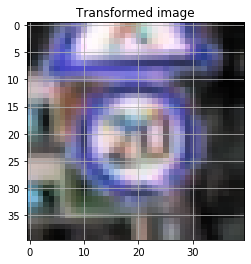

transformed


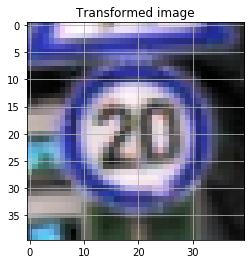

transformed


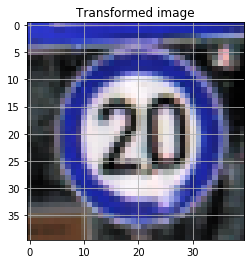

In [0]:
import matplotlib.pyplot as plt
import cv2
for img_path in all_img_paths[0:30:10]:
    img = cv2.imread(img_path)
    img = preprocess_img(img) #내가 만든함수 적용완료.
    print('transformed')
    plt.imshow(img)
    plt.grid('off')    
    plt.title('Transformed image')
    plt.show()

# 밝기에 대해서 상당히 통일되어있음. 어두운 부분이 명확해짐.
# 기억할것. skimage.exposure.equalize_hist 

In [0]:
from tensorflow.keras.utils import to_categorical

imgs = []
labels = []
for img_path in all_img_paths:
    img = preprocess_img(io.imread(img_path))
    label = img_path.split('\\')[-2] # '\\' 기준으로 쪼개개 되며, 그중 뒤에서 두번째가 label에 해당
    imgs.append(img)
    labels.append(label)

X=np.array(imgs)
print(np.max(X))
classes=len(set(np.array(labels))) # set함수는 집함함수임. dict와 다른점은, key가없음. 그냥 집합이라 생각하면 쉬움.
print(classes) # class는 43개 (폴터도 0부터 42까지 총 43개의 큰폴더임. )
y=to_categorical(labels,num_classes=classes) # one-hot category로 바꿔버림.

1.0000000000000004
43


In [0]:
X=X.reshape(-1,40*40*3)

In [0]:
# 데이터 저장하기
import numpy as np
np.savetxt('C:/Users/82104/Desktop/X.csv',X)
np.savetxt('C:/Users/82104/Desktop/y.csv',y)

In [0]:
##############################################################

In [0]:
# 데이터 읽기. 여기서부터 시작.
import numpy as np

X = np.loadtxt('X.csv')
y = np.loadtxt('y.csv')

In [0]:
X=X.reshape(-1,40,40,3)

In [0]:
print(X.shape,'\n',y.shape,sep='')

(39209, 40, 40, 3)
(39209, 43)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31367, 40, 40, 3) (31367, 43)
(7842, 40, 40, 3) (7842, 43)


In [0]:
IMG_SIZE = 40
classes=43

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                 activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',
                 activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 40, 40, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 38, 38, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data = (x_test, y_test)
          )

Epoch 1/10
981/981 [==============================] - 7s 7ms/step - loss: 1.1845 - acc: 0.6564 - val_loss: 0.1593 - val_acc: 0.9507
Epoch 2/10
981/981 [==============================] - 6s 6ms/step - loss: 0.1981 - acc: 0.9385 - val_loss: 0.0599 - val_acc: 0.9823
Epoch 3/10
981/981 [==============================] - 6s 7ms/step - loss: 0.1269 - acc: 0.9609 - val_loss: 0.0547 - val_acc: 0.9841
Epoch 4/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0964 - acc: 0.9709 - val_loss: 0.0312 - val_acc: 0.9922
Epoch 5/10
981/981 [==============================] - 6s 6ms/step - loss: 0.0745 - acc: 0.9775 - val_loss: 0.0343 - val_acc: 0.9897
Epoch 6/10
981/981 [==============================] - 6s 7ms/step - loss: 0.0717 - acc: 0.9786 - val_loss: 0.0311 - val_acc: 0.9920
Epoch 7/10
981/981 [==============================] - 7s 7ms/step - loss: 0.0651 - acc: 0.9803 - val_loss: 0.0407 - val_acc: 0.9907
Epoch 8/10
981/981 [==============================] - 6s 7ms/step - loss: 0.

In [0]:
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data = (x_test, y_test)
          )

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 2699s 86ms/step - loss: 1.1175 - acc: 0.6750 - val_loss: 0.1589 - val_acc: 0.9552
Epoch 2/10
31367/31367 [==============================] - 2662s 85ms/step - loss: 0.1980 - acc: 0.9379 - val_loss: 0.0673 - val_acc: 0.9784
Epoch 3/10
31367/31367 [==============================] - 2654s 85ms/step - loss: 0.1308 - acc: 0.9583 - val_loss: 0.0478 - val_acc: 0.9866
Epoch 4/10
31367/31367 [==============================] - 2663s 85ms/step - loss: 0.0959 - acc: 0.9702 - val_loss: 0.0446 - val_acc: 0.9874
Epoch 5/10
31367/31367 [==============================] - 2665s 85ms/step - loss: 0.0865 - acc: 0.9740 - val_loss: 0.0635 - val_acc: 0.9844
Epoch 6/10
31367/31367 [==============================] - 2660s 85ms/step - loss: 0.0812 - acc: 0.9747 - val_loss: 0.0303 - val_acc: 0.9909
Epoch 7/10
31367/31367 [==============================] - 2656s 85ms/step - loss: 0.0712 - acc: 0.9791 - val_lo

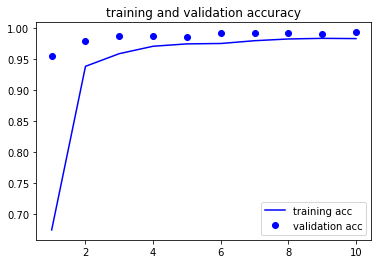

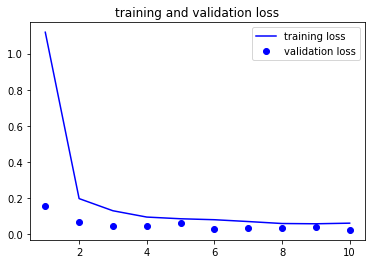

In [0]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()